In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import entropy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [48]:
digits = load_digits()
X = digits.data
y = digits.target

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

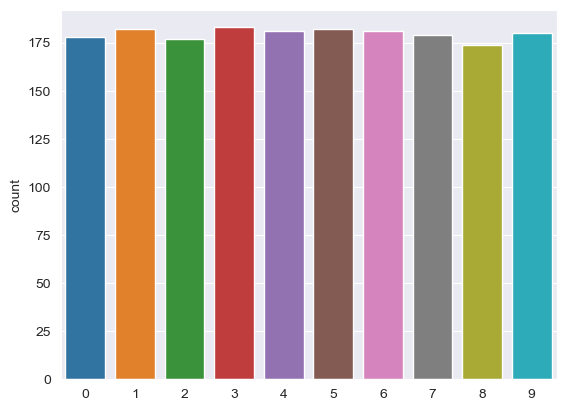

In [50]:
#Use a count plot to show the number of samples of each class.
sns.countplot(y)


C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Accuracy of SVC:  0.987037037037037
Macro F1 of SVC:  0.9869102479765148


<AxesSubplot:>

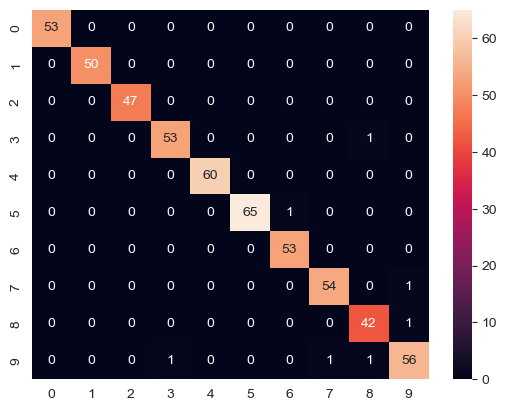

In [49]:

#First experiment:
#Divide the data into training (70%) and testing (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit four classifiers: SVC, RandomForestClassifier, MLPClassifier, KNeighborsClassifier
#For each classifier, predict the values for the testing set and print: Accuracy, Macro F1 and Confusion matrix


clf1 = SVC()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print("Accuracy of SVC: ", accuracy_score(y_test, y_pred1))
print("Macro F1 of SVC: ", f1_score(y_test, y_pred1, average='macro'))
#print("Confusion matrix of SVC: ", confusion_matrix(y_test, y_pred1))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt="d")

Accuracy of RandomForestClassifier:  0.9685185185185186
Macro F1 of RandomForestClassifier:  0.9694674859241248


<AxesSubplot:>

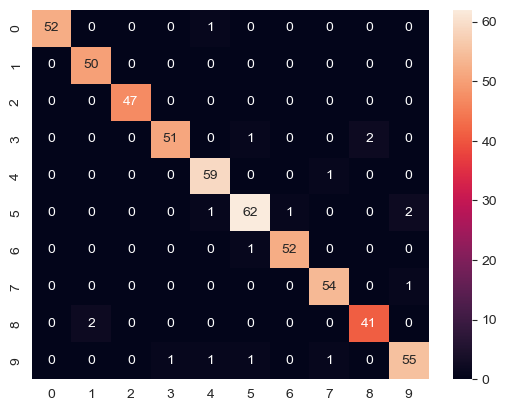

In [39]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy of RandomForestClassifier: ", accuracy_score(y_test, y_pred2))
print("Macro F1 of RandomForestClassifier: ", f1_score(y_test, y_pred2, average='macro'))
#print("Confusion matrix of RandomForestClassifier: ", confusion_matrix(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt="d")

Accuracy of MLPClassifier:  0.975925925925926
Macro F1 of MLPClassifier:  0.9757259413112699


<AxesSubplot:>

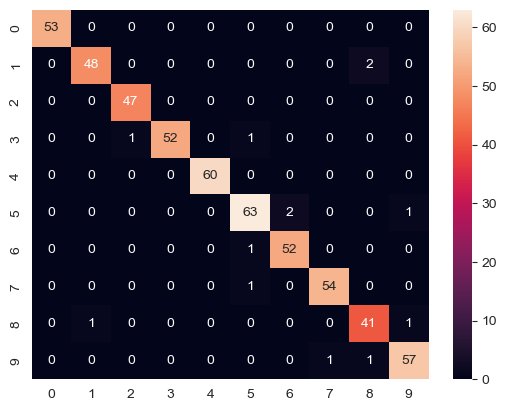

In [40]:
clf3 = MLPClassifier()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print("Accuracy of MLPClassifier: ", accuracy_score(y_test, y_pred3))
print("Macro F1 of MLPClassifier: ", f1_score(y_test, y_pred3, average='macro'))
#print("Confusion matrix of MLPClassifier: ", confusion_matrix(y_test, y_pred3))
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt="d")

Accuracy of KNeighborsClassifier:  0.9925925925925926
Macro F1 of KNeighborsClassifier:  0.9932926951491272


C:\Users\angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

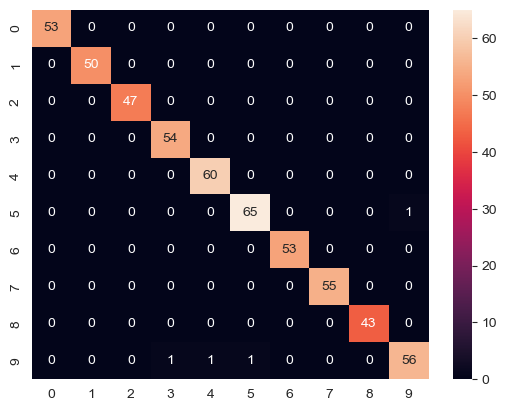

In [46]:
clf4 = KNeighborsClassifier()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
print("Accuracy of KNeighborsClassifier: ", accuracy_score(y_test, y_pred4))
print("Macro F1 of KNeighborsClassifier: ", f1_score(y_test, y_pred4, average='macro'))
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt="d")
#print("Confusion matrix of KNeighborsClassifier: ", confusion_matrix(y_test, y_pred4))

C:\Users\angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\angel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

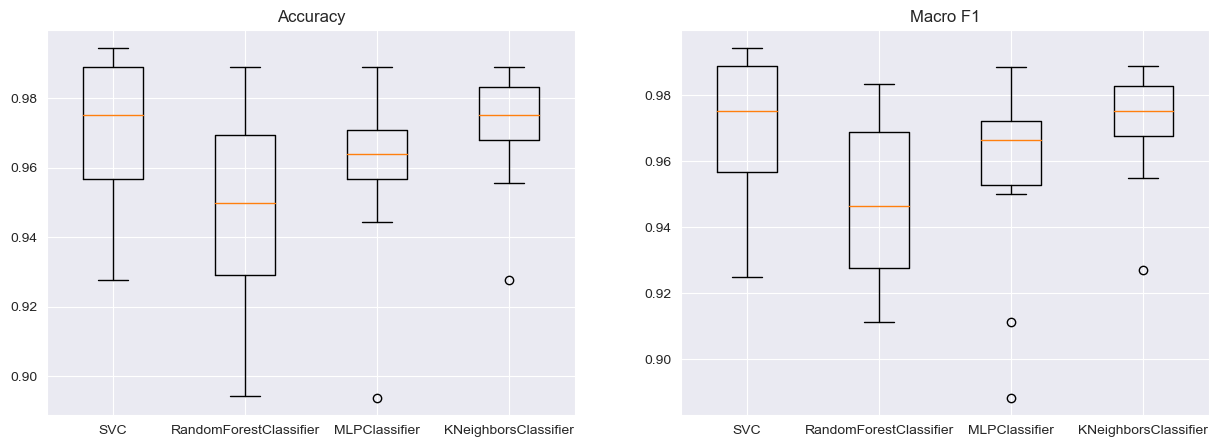

In [47]:
#Second experiment: Use cross-validation (k=10) to analyze the performance of different classifiers (SVC, RandomForestClassifier, MLPClassifier, KNeighborsClassifier)
# Use boxplots to show the performance of the classifiers using accuracy and Macro-F1.

from sklearn.model_selection import cross_val_score

clf1 = SVC()
clf2 = RandomForestClassifier()
clf3 = MLPClassifier()
clf4 = KNeighborsClassifier()

scores1 = cross_val_score(clf1, X, y, cv=10, scoring='accuracy')
scores2 = cross_val_score(clf2, X, y, cv=10, scoring='accuracy')
scores3 = cross_val_score(clf3, X, y, cv=10, scoring='accuracy')
scores4 = cross_val_score(clf4, X, y, cv=10, scoring='accuracy')

scores1_f1 = cross_val_score(clf1, X, y, cv=10, scoring='f1_macro')
scores2_f1 = cross_val_score(clf2, X, y, cv=10, scoring='f1_macro')
scores3_f1 = cross_val_score(clf3, X, y, cv=10, scoring='f1_macro')
scores4_f1 = cross_val_score(clf4, X, y, cv=10, scoring='f1_macro')

scores = [scores1, scores2, scores3, scores4]
scores_f1 = [scores1_f1, scores2_f1, scores3_f1, scores4_f1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].boxplot(scores)
ax[0].set_xticklabels(['SVC', 'RandomForestClassifier', 'MLPClassifier', 'KNeighborsClassifier'])
ax[0].set_title('Accuracy')
ax[1].boxplot(scores_f1)
ax[1].set_xticklabels(['SVC', 'RandomForestClassifier', 'MLPClassifier', 'KNeighborsClassifier'])
ax[1].set_title('Macro F1')
plt.show()

